# CMP 464 & 788 Mid-Term Project – Stage 2

During the first stage of the midterm project, we explored the dataset from Kaggle Titanic project and handled missing values. For the second stage, we will apply Machine Learning models that we have learned to build classifiers on the dataset, and then evaluate their performances. This stage is due on Monday, March 19 at 11:59pm. You are expected to submit a complete Jupyter notebook with python code (with detailed comments), numerical results, and graphs (with proper labeling) to Blackboard.

### 1. Data preparation  

1) Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.  

2) Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embark_S, Embark_C, and Embark_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embark_S should be set to 1, and Embark_C and Embark_Q should be zero. (pandas.get_dummies() can help you with this)  

3) Feature Scaling: Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).  

4) Because the test dataset has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. Split the dataset into training set, validation set, and test set. (sklearn.model_selection.train_test_split() can help you with this)  

(Optional: Feature Engineering) Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

### 2. Building models  
So far, we have learned four models: linear regression, polynomial regression, logistic regression, and k-nearest neighbors method. Choose models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model (in next stage we will fine-tune the models in a systematic manner).

### 3. Evaluate the models  
For each model you have trained, perform the following evaluations: 

1) cross validation (show precisions)  

2) confusion matrix, precision, and recall  

3) precision and recall tradeoff  

4) ROC curve and show AUC (area under curve)


In [64]:
import os
datapath = os.getcwd()
datapath = os.path.join(datapath, '')
os.chdir(datapath)
os.getcwd()


import pandas as pd

titanic_train = pd.read_csv(datapath + 'train.csv', thousands=',', delimiter=',') # updated CSv file with all changes
titanic_train.drop('Cabin',1, inplace=True)

titanic_test = pd.read_csv(datapath + 'test.csv', thousands=',', delimiter=',') # updated CSv file with all changes
titanic_test.drop('Cabin',1, inplace=True)

In [65]:
# Sex in the original dataset is categorial, and thus cannot be directly fed 
# into Machine Learning models. Please convert the categories into 0’s and 1’s.

titanic_train.replace(('female', 'male'), (1, 0), inplace=True)
titanic_test.replace(('female', 'male'), (1, 0), inplace=True)

print(titanic_test.head())  

print(titanic_train.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

              

In [66]:
# Please replace the Embarked variable with three variables – Embark_S, Embark_C, and Embark_Q – to indicate the place 
# a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embark_S should be set to 1, and 
# Embark_C and Embark_Q should be zero. (pandas.get_dummies() can help you with this)

embarked = pd.get_dummies(titanic_train['Embarked'])     # could not get pd.get_dummies(titanic_train, columns='Embarked') to work and make 
titanic_train2 = pd.concat([titanic_train,embarked],axis=1)  # Embark_C, Embark_Q, and Embark_S
print(titanic_train2.shape)
print(titanic_train2.head())

embarked = pd.get_dummies(titanic_test['Embarked'])     # could not get pd.get_dummies(titanic, columns='Embarked') to work and make 
titanic_test2 = pd.concat([titanic_test,embarked],axis=1)  # Embark_C, Embark_Q, and Embark_S
print(titanic_test2.shape)
print(titanic_test2.head())

(891, 14)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket    Fare Embarked  C  Q  S  
0         A/5 21171   7.250        S  0  0  1  
1          PC 17599  14.450        C  1  0  0  
2  STON/O2. 3101282   7.925        S  0  0  1  
3            113803  14.450        S  0  0  1  
4            373450   8.050        S  0  0  1 

In [85]:
# Drop columns with strings
titanic_train_noStrings = titanic_train2[['PassengerId','Pclass','Survived','Sex','Age','SibSp','Parch','Fare','C','S','Q']]
titanic_test_noStrings = titanic_test2[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','C','S','Q']]
titanic_test_noStrings.shape


(418, 10)

In [68]:
# Feature Scaling: Machine learning models usually work best on datasets whose variables have similar ranges. 
#     Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() 
#                                                                            can help you with this).

from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

df_train = sclr.fit_transform(titanic_train_noStrings)
print(df_train)
df2_train = pd.DataFrame(df_train, columns=titanic_train_noStrings.columns)
print(df2_train.shape)

df_test = sclr.fit_transform(titanic_test_noStrings)
print(df_test)
df2_test = pd.DataFrame(df_test, columns=titanic_test_noStrings.columns)
print(df2_test.head())


[[-1.73010796  0.82737724 -0.78927234 ..., -0.48204268  0.61583843
  -0.30756234]
 [-1.72622007 -1.56610693  1.2669898  ...,  2.0745051  -1.62380254
  -0.30756234]
 [-1.72233219  0.82737724  1.2669898  ..., -0.48204268  0.61583843
  -0.30756234]
 ..., 
 [ 1.72233219  0.82737724 -0.78927234 ..., -0.48204268  0.61583843
  -0.30756234]
 [ 1.72622007 -1.56610693  1.2669898  ...,  2.0745051  -1.62380254
  -0.30756234]
 [ 1.73010796  0.82737724 -0.78927234 ..., -0.48204268 -1.62380254
   3.25137334]]
(891, 11)
[[-1.72791209  0.87348191 -0.75592895 ..., -0.56814154 -1.35067551
   2.84375747]
 [-1.71962474  0.87348191  1.32287566 ..., -0.56814154  0.74037028
  -0.35164743]
 [-1.71133739 -0.31581919 -0.75592895 ..., -0.56814154 -1.35067551
   2.84375747]
 ..., 
 [ 1.71133739  0.87348191 -0.75592895 ..., -0.56814154  0.74037028
  -0.35164743]
 [ 1.71962474  0.87348191 -0.75592895 ..., -0.56814154  0.74037028
  -0.35164743]
 [ 1.72791209  0.87348191 -0.75592895 ...,  1.76012477 -1.35067551
  -0.3

In [69]:
# Because the test dataset has no information on survival, it cannot be used to evaluate the performance of 
# the model. As a result, we need to further split the data in train.csv into training set (80%) and validation 
# set (20%). We will use training set to build the models, and use validation set to evaluate them. Split the dataset 
# into training set, validation set, and test set. (sklearn.model_selection.train_test_split() can help you with this)

from sklearn.model_selection import train_test_split
X = df2_train.drop(['Survived'],axis=1)
y = df2_train[['Survived']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 10)
(179, 10)
(712, 1)
(179, 1)


C:\Users\Amanda\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\utils\

[[377  67]
 [ 82 186]]
precision: 0.735177865613
recall: 0.694029850746
F1 score: 0.714011516315


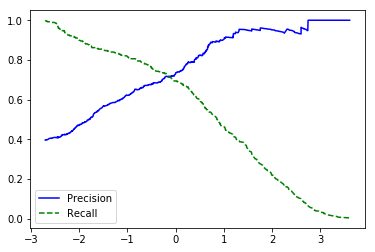

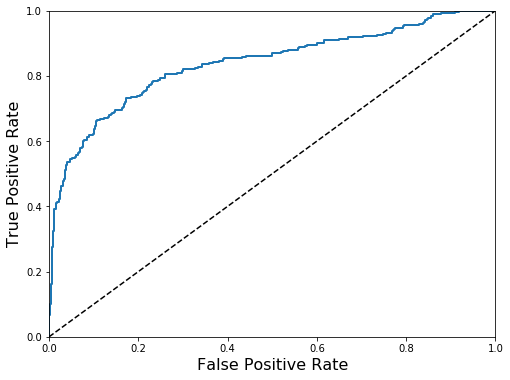

ValueError: continuous-multioutput format is not supported

In [87]:
# I'm not sure how to fix this error "Unknown label type: 'continuous'"

# logistic regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
# print('here')
# print(X_train.head())
# print(y_train.head())
# print(y_train.columns)
# convert 'Suvived' to 0-1 values
# y_train.iloc[y_train['Survived'] > 0, 0] = 1
y_train.loc[y_train['Survived'] < 0, 'Survived'] = 0
y_train.loc[y_train['Survived'] > 0, 'Survived'] = 1

# y_train.loc[y_train > 0] = 1
# y_train.loc[y_train < 0] = 0

# print('new y_train:', y_train)
log_reg.fit(X_train, y_train)
# print('here2')
test_set = df2_test.assign(prediction=log_reg.predict(\
                            df2_test))


# 1) cross validation (show precisions)
from sklearn.model_selection import cross_val_score  
cross_val_score(log_reg, X_train, y_train, 
                cv=3,
                scoring="accuracy")

# 2) confusion matrix, precision, and recall
from sklearn.model_selection import cross_val_predict
df2_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, df2_train_pred))

# compute precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision:', precision_score(y_train, df2_train_pred))
print('recall:', recall_score(y_train, df2_train_pred))
print('F1 score:', f1_score(y_train, df2_train_pred))

# 3) precision and recall tradeoff
# precision-recall curve
from sklearn.metrics import precision_recall_curve
titanic_scores = cross_val_predict(log_reg, X_train, y_train, cv=3,
                             method="decision_function")
titanic_scores.shape

import matplotlib.pyplot as plt
%matplotlib inline
precisions, recalls, thresholds = precision_recall_curve(y_train, titanic_scores)
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
plt.legend()
plt.show()

# 4) ROC curve and show AUC (area under curve)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, titanic_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

from sklearn.metrics import roc_auc_score
titanic_scores = log_reg.decision_function(df2_test)
tpr, fpr, thresholds = roc_curve(df2_test, titanic_scores)
plt.plot(tpr, fpr)
plt.plot([0,1], [0,1], '--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
print('Area under ROC curve (AUC)', roc_auc_score(df2_test, titanic_scores))


C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d a

[[390  54]
 [ 90 178]]
precision: 0.76724137931
recall: 0.664179104478
F1 score: 0.712


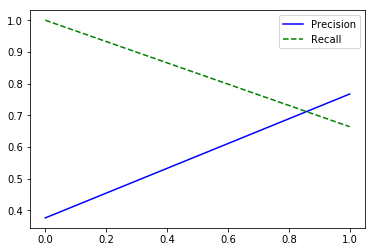

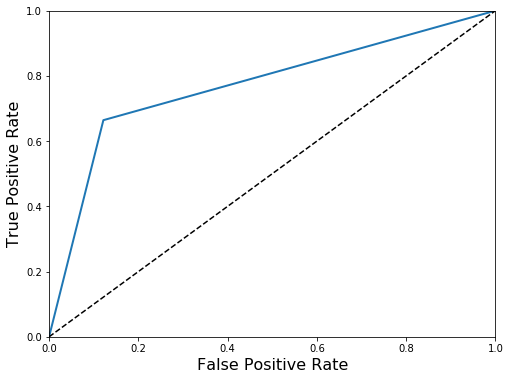

ValueError: continuous-multioutput format is not supported

In [94]:
# k-nearest neighbors 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_train)

# 1) cross validation (show precisions)
from sklearn.model_selection import cross_val_score  # inputs and what kind of model we are using (knn)
cross_val_score(knn, X_train, y_train, 
                cv=3,
                scoring="accuracy")

# 2) confusion matrix, precision, and recall
from sklearn.model_selection import cross_val_predict
df2_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, df2_train_pred))

# compute precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision:', precision_score(y_train, df2_train_pred))
print('recall:', recall_score(y_train, df2_train_pred))
print('F1 score:', f1_score(y_train, df2_train_pred))

# 3) precision and recall tradeoff
# precision-recall curve
from sklearn.metrics import precision_recall_curve
titanic_scores = cross_val_predict(knn, X_train, y_train, cv=3,
                             method="predict")
titanic_scores.shape
precisions, recalls, thresholds = precision_recall_curve(y_train, titanic_scores)
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
plt.legend()
plt.show()

# 4) ROC curve and show AUC (area under curve)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, titanic_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

from sklearn.metrics import roc_auc_score
titanic_scores = knn.predict(df2_test)
tpr, fpr, thresholds = roc_curve(df2_test, titanic_scores)
plt.plot(tpr, fpr)
plt.plot([0,1], [0,1], '--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
print('Area under ROC curve (AUC)', roc_auc_score(df2_test, titanic_scores))